## Graphlet Degree Vector

In [80]:
import sys
import os
import networkx as nx
import pandas as pd

We're using motif counting from https://github.com/benedekrozemberczki/OrbitalFeatures

In [83]:
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [85]:
from src.orbitalfeatures.motif_count import MotifCounterMachine
from src.util.tsne import tsne
from src.util.visualization import draw_scatterplot
from src.util.pandas import set_index_as_label

In [87]:
output_filename = "output.csv"

In [89]:
def sample_graph():
    G = nx.Graph()
    G.add_node("A")
    G.add_node("B")
    G.add_node("C")
    G.add_node("D")
    G.add_node("E")


    G.add_edge("A", "B")
    G.add_edge("B", "C")
    G.add_edge("A", "D")
    G.add_edge("B", "D")
    G.add_edge("D", "E")
    return G

## Using Karateclub Sample Graph

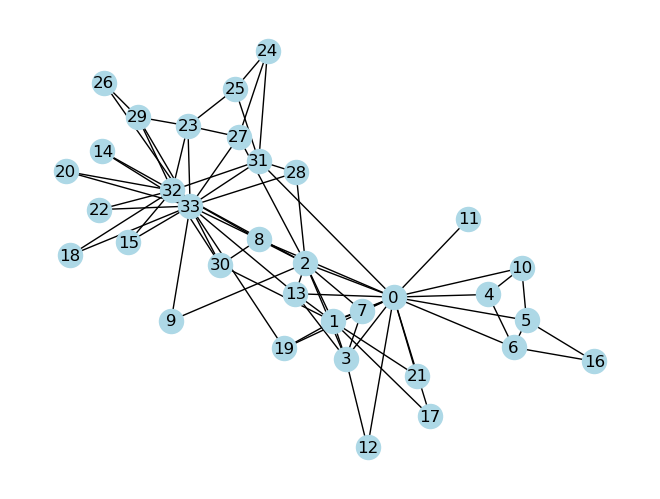

In [150]:
G = nx.karate_club_graph()
nx.draw(G, with_labels=True, node_color="lightblue")

Calculating the graphlets

In [153]:
args = dict()
args["output"] = output_filename
args["graphlet_size"] = 3

model = MotifCounterMachine(G, args)
model.extract_features()


Enumerating subgraphs.

Enumerating graphlets with size: 3.


100%|██████████| 78/78 [00:00<00:00, 38956.38it/s]



Counting orbital roles.



100%|██████████| 438/438 [00:00<00:00, 4373.31it/s]

Saving the dataset.


In [155]:
df = pd.read_csv(output_filename)
df = df.iloc[:, :-1] # Remove last column which just contains 0
df.head()

,id,role_0,role_1,role_2,role_3
0,0,16,17,102,18
1,1,9,19,24,12
2,2,10,34,34,11
3,3,6,20,5,10
4,4,3,16,1,2


In [157]:
tsne_df = tsne(df.drop(columns=['id']))
set_index_as_label(tsne_df)
tsne_df.head()

,X,Y,Label
0,397.577667,-103.838974,0
1,166.819992,-49.354034,1
2,174.750809,-142.076340,2
3,-327.799225,211.800568,3
4,3.516644,323.723877,4


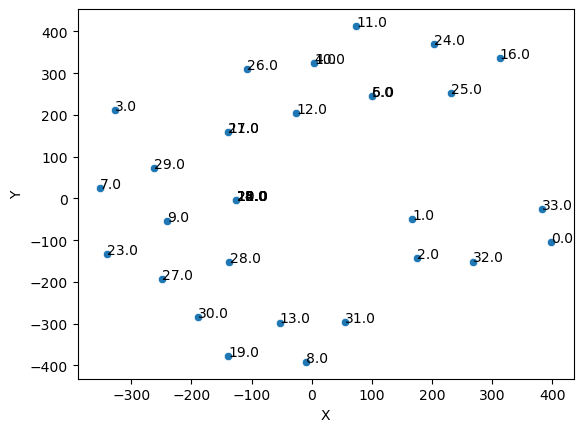

In [159]:
draw_scatterplot(tsne_df, label="Label")
